In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


# **Machine learning project to predict values of "Z" column for the new data**

## **Step 1: 1. IMPORTING DATA/DATAFRAME,
2. GIVING IT COLUMNS NAMES ETC**

In [9]:
cols = ['x', 'y', 'z']
df = pd.read_csv('/content/drawndata2.csv', names = cols)
df.head()

,x,y,z
0,x,y,z
1,469.7593545676588,453.5749462453128,a
2,535.3318190327325,435.22184844984116,a
3,504.2855261364733,437.76757841503013,a
4,469.8913980729759,368.3716515632428,a


In [10]:
df.tail()

,x,y,z
213,600.1439878641712,80.49153404236671,b
214,568.9996848051495,83.04455798578289,b
215,618.746701026483,76.64459621482314,b
216,623.8274394650012,33.22423391702955,b
217,642.2728970003902,94.93177143694678,b


## **3. IDENTYFYING THE VALUES WE ARE GOING TO BE LOOKING FOR EX: HOUSE PRICE, CLASS,....**

In [11]:
df['z'] = (df['z'] == 'a').astype(int)

## **4. WE CAN VISUALIZE IT:**

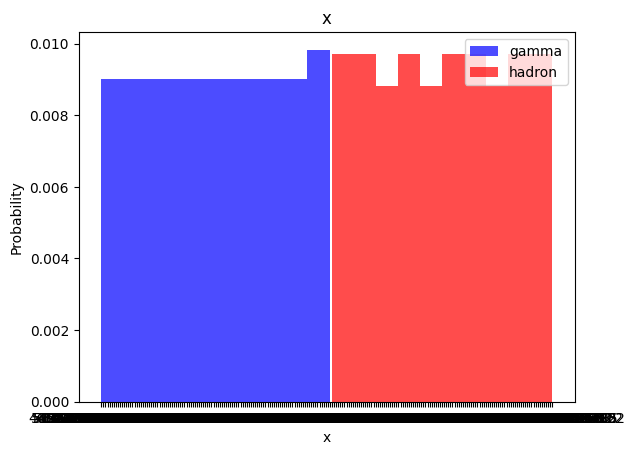

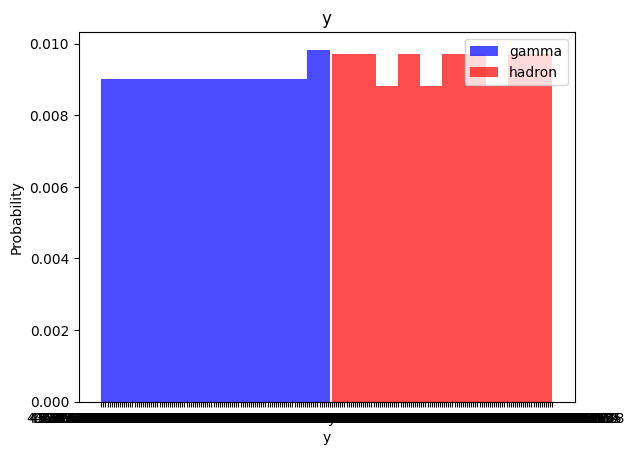

In [13]:
for label in cols[:-1]:
  plt.hist(df[df["z"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["z"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


## **5. WE TRAIN THE DATRASET. WE DIVIDE THE DATASET INTO A TRAIN AND TEST DATA:**

In [14]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


## **6. WE BUILD A SCALER**

In [15]:
def scale_dataset(dataframe, oversample=False):
  # Before extracting X, identify and potentially drop or convert non-numeric columns
  non_numeric_cols = dataframe.select_dtypes(exclude=np.number).columns

  for col in non_numeric_cols:
    dataframe[col] = dataframe[col].replace('x', 0)
    dataframe[col] = dataframe[col].replace('y', 0)

  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y


## **NOW WE CAN BUILD OUR MODELS AND SEE HOW ACCURATE THEY ARE**

In [16]:
train, X_train, y_train = scale_dataset(train, oversample = True)
valid, X_valid, y_valid = scale_dataset(valid, oversample = False)
test, X_test, y_test = scale_dataset(test, oversample = False)

**KNN**

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [29]:
knn_model = KNeighborsClassifier(n_neighbors=30)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [30]:
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.95      1.00      0.98        21

    accuracy                           0.98        44
   macro avg       0.98      0.98      0.98        44
weighted avg       0.98      0.98      0.98        44



**NAIVE BAYES**




















































































































































































































































**

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [31]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [32]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.57      0.63        23
           1       0.62      0.76      0.68        21

    accuracy                           0.66        44
   macro avg       0.67      0.66      0.66        44
weighted avg       0.67      0.66      0.66        44



**LOGISTIC REGRESSION**

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [33]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [34]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.61      0.61        23
           1       0.57      0.57      0.57        21

    accuracy                           0.59        44
   macro avg       0.59      0.59      0.59        44
weighted avg       0.59      0.59      0.59        44



**SVM**

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [35]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [37]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.95      1.00      0.98        21

    accuracy                           0.98        44
   macro avg       0.98      0.98      0.98        44
weighted avg       0.98      0.98      0.98        44

